In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [61]:
df.head(4)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77


In [62]:
# Load the dataset
df = pd.read_csv('mall_customers.csv')
df.drop(['CustomerID','Gender'],axis=1,inplace=True)
df.head(4)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [64]:
# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Convert the scaled data to a DataFrame
df1= pd.DataFrame(df_scaled,columns=df.columns)
df1


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


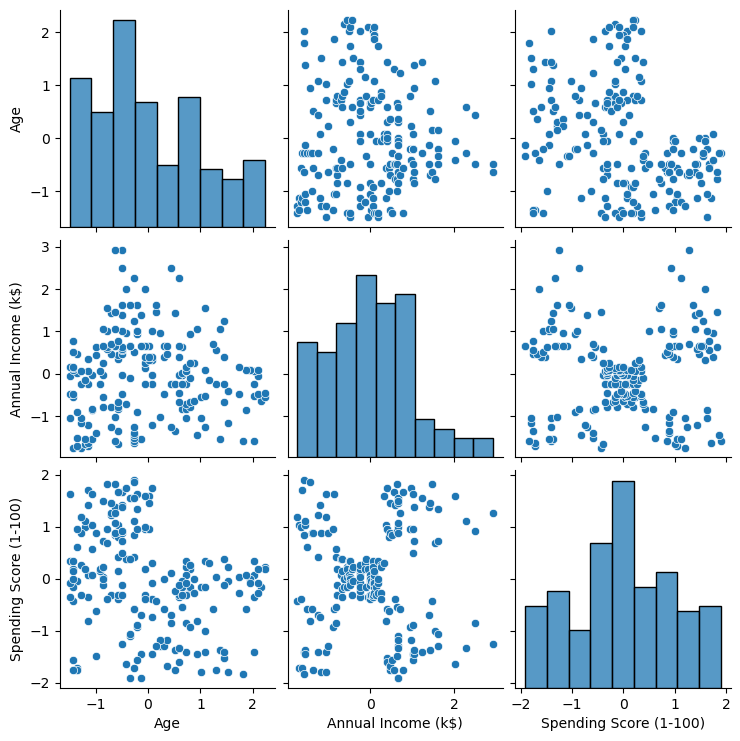

In [65]:
sns.pairplot(data = df1)
plt.show()

In [66]:
# Perform K-means clustering for different values of k
k_values = range(1,21)  # Test 'k' from 1 to 20
intertias = []  # List to store the inertia values

In [67]:
intertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df1)
    intertias.append(kmeans.inertia_)
    

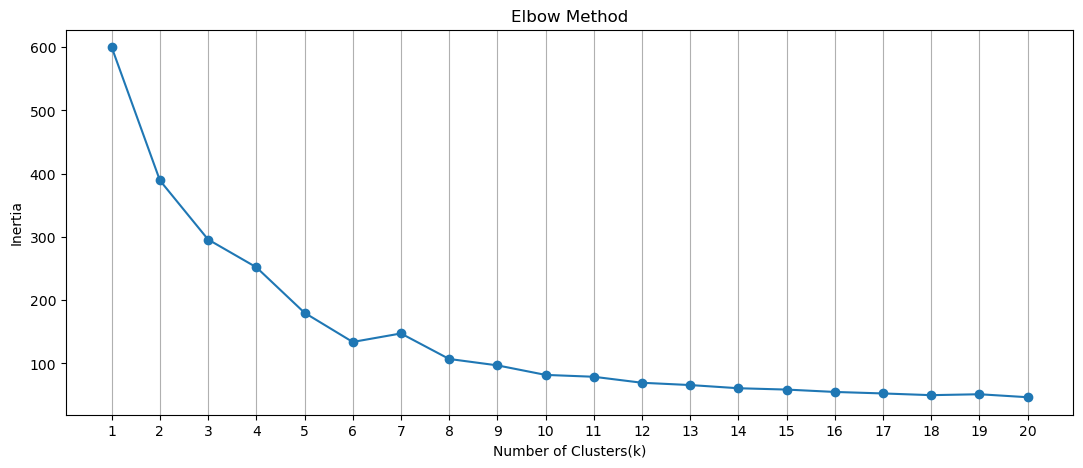

In [78]:
# Plot the 'Elbow Curve'
plt.figure(figsize=(13,5))
plt.plot(k_values,intertias, marker='o')
plt.xlabel('Number of Clusters(k)')
plt.xticks(k_values)

plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(axis='x')
plt.show()

In [75]:
# Create a KMeans model with 5 Clusters
kmeans = KMeans(n_clusters=5)

In [70]:
# Fit the model to the data
kmeans.fit(df1)

KMeans(n_clusters=5)

In [71]:
# Predict the cluster labels for the data
y_pred = kmeans.predict(df1)
y_pred

array([4, 4, 1, 4, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4,
       1, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 3, 4, 4, 4, 2, 2, 2, 2, 4, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [72]:
# Add the predicted cluster labels to the original dataset
df1['Cluster']= y_pred
df1.sample(5)

,Age,Annual Income (k$),Spending Score (1-100),Cluster
77,0.082532,-0.250391,-0.085407,2
83,0.513132,-0.250391,-0.240694,2
36,0.226065,-1.013780,-1.288876,1
40,1.876699,-0.861102,-0.590088,2
150,0.297832,0.665675,-1.288876,3


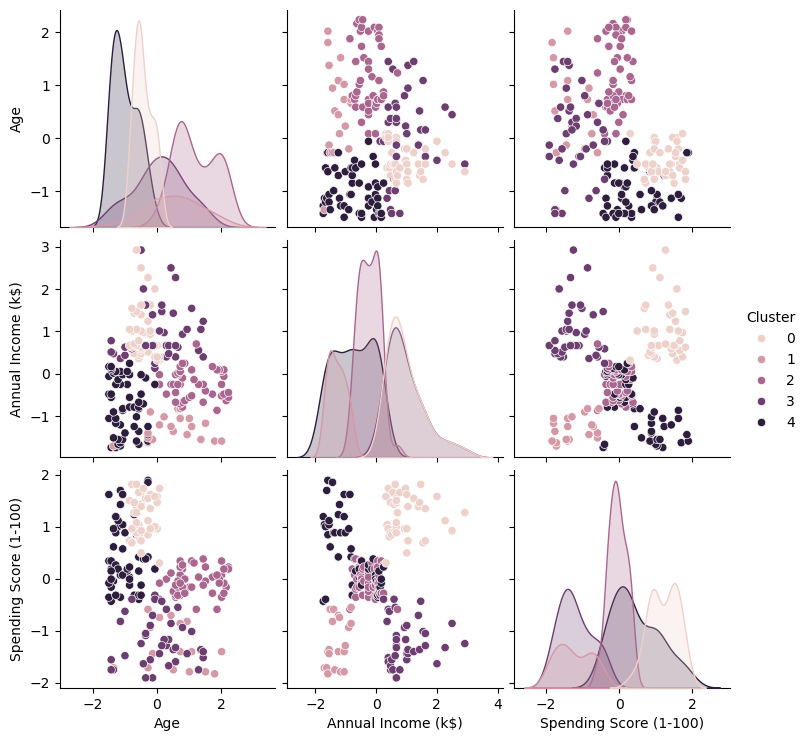

In [73]:
sns.pairplot(data = df1 , hue= 'Cluster')
plt.show()

### CONCLUSION:-

#### Based on the K-Means clustering algorithm applied to the Mall Customers dataset,

### Customer Segmentation:
##### The K-Means algorithm has successfully segmented the customers into 5 distinct clusters based on their annual income and spending score.
mers

In [ ]:
# plt.plot(range(1,20), intertias)